<a href="https://colab.research.google.com/github/Fadinrsultan/RNN/blob/main/CIFAR_10_Classification_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adagrad

# 1. Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# CIFAR-10 has:
# - 50,000 training images
# - 10,000 testing images
# - Each image is 32x32x3 (color), with labels 0 through 9

# 2. Preprocess the data
# Convert labels from shape (num_samples, 1) -> (num_samples,)
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Scale images to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 3. Reshape images for RNN input
# Each image: 32 rows (time steps) x (32*3) features = 32 x 96
n_train = X_train.shape[0]  # Number of training samples
n_test = X_test.shape[0]    # Number of test samples

X_train = X_train.reshape(n_train, 32, 32 * 3)  # (n_train, 32, 96)
X_test = X_test.reshape(n_test, 32, 32 * 3)     # (n_test, 32, 96)

# 4. Define a simple LSTM model
model = Sequential([
    # LSTM processes the sequence (32 time steps, each of size 96)
    LSTM(128, input_shape=(32, 96), return_sequences=False),
    Dropout(0.3),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# 5. Compile the model
#    Using Adagrad as in your original code
model.compile(
    optimizer=Adagrad(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Train the model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,  # 10% of the training data used for validation
    epochs=100,            # Increase epochs for better results
    batch_size=128
)

# 7. Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.1287 - loss: 2.2885 - val_accuracy: 0.2628 - val_loss: 2.0586
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.2363 - loss: 2.0655 - val_accuracy: 0.3050 - val_loss: 1.9369
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.2842 - loss: 1.9434 - val_accuracy: 0.3290 - val_loss: 1.8432
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.3097 - loss: 1.8774 - val_accuracy: 0.3218 - val_loss: 1.8426
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.3322 - loss: 1.8170 - val_accuracy: 0.3364 - val_loss: 1.8232
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.3474 - loss: 1.7812 - val_accuracy: 0.3672 - val_loss: 1.7216
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.3661 - loss: 1.7410 - val_accuracy: 0.3894 - val_loss: 1.6836
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.3730 - loss: 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
Sample true label: 6
Sample predicted class: 6


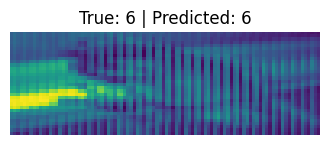

In [2]:
import matplotlib.pyplot as plt

# 7. Make a prediction on one sample
sample_idx = 7  # change index to see different samples
sample_image = np.expand_dims(X_test[sample_idx], axis=0)
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction[0])

print(f"Sample true label: {y_test[sample_idx]}")
print(f"Sample predicted class: {predicted_class}")

# --- Show the image with matplotlib ---
plt.figure(figsize=(8, 6))                             # Create a new figure
plt.imshow(X_test[sample_idx])          # Display the sample image
plt.title(f"True: {y_test[sample_idx]} | Predicted: {predicted_class}")
plt.axis('off')                         # Hide axis ticks
plt.show()                              # Render the plot